OSMN Pipeline

- 0 - Obtaining the data
- S - Scrubbing / Cleaning the data
- E - EDA - Explorative data analysis or visualizing the data to allow us to find patterns and trends
- M - Modeling our data will give us our predictive power
- N - Interpreting our data

#### 1. **Obtain**

- **Description**: Collect the data, needed for analysis.
- **Activities**:
   - Accessing datasets
   - Integrating different data sources.
   - Storing the collected data for further use



**Scrub Data**


In [7]:
import pandas as pd
diabetes_data = pd.read_csv('diabetes.csv')


In [19]:
diabetes_data.head()
diabetes_data.info(verbose=True)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


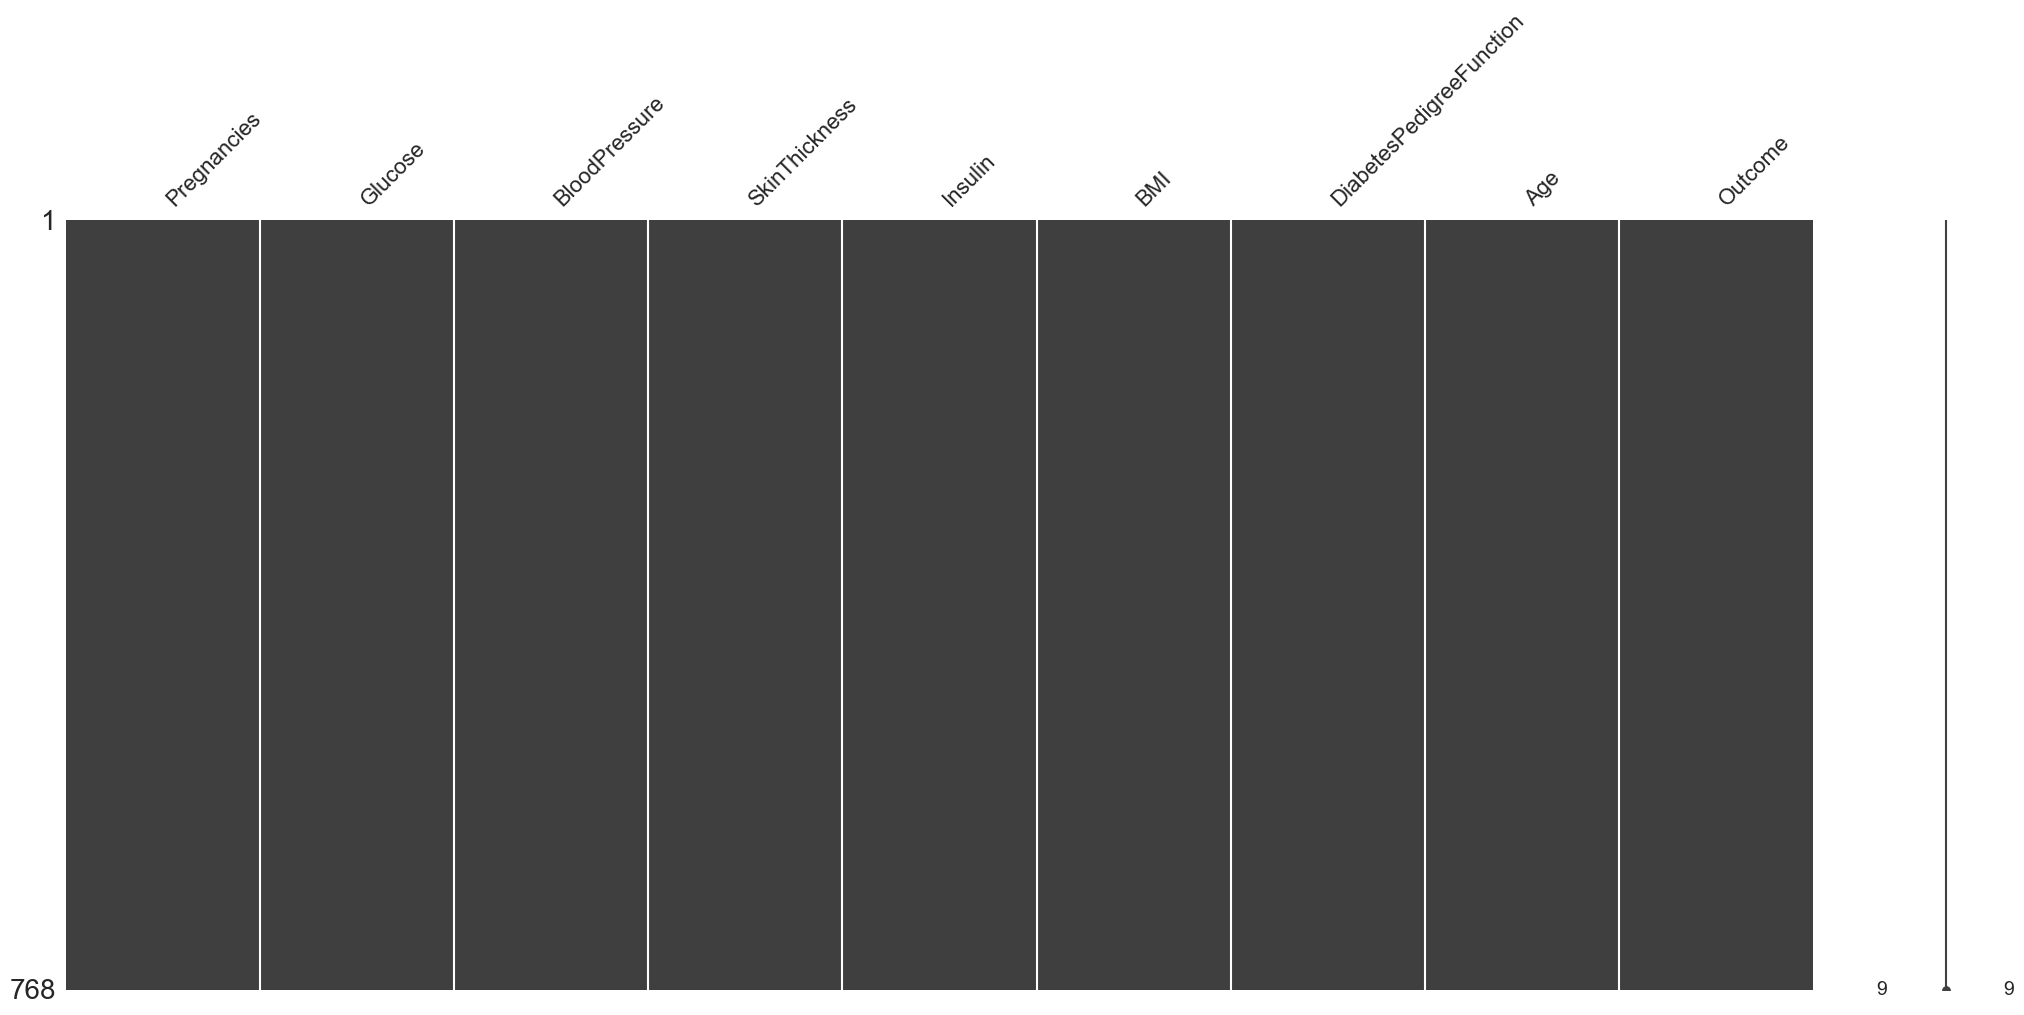

In [24]:
import numpy as np

diabetes_data_copy = diabetes_data.copy(deep = True)
diabetes_data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.nan)

print(diabetes_data_copy.isnull().sum())

# null count analysis
import missingno as msno
p = msno.matrix(diabetes_data_copy)

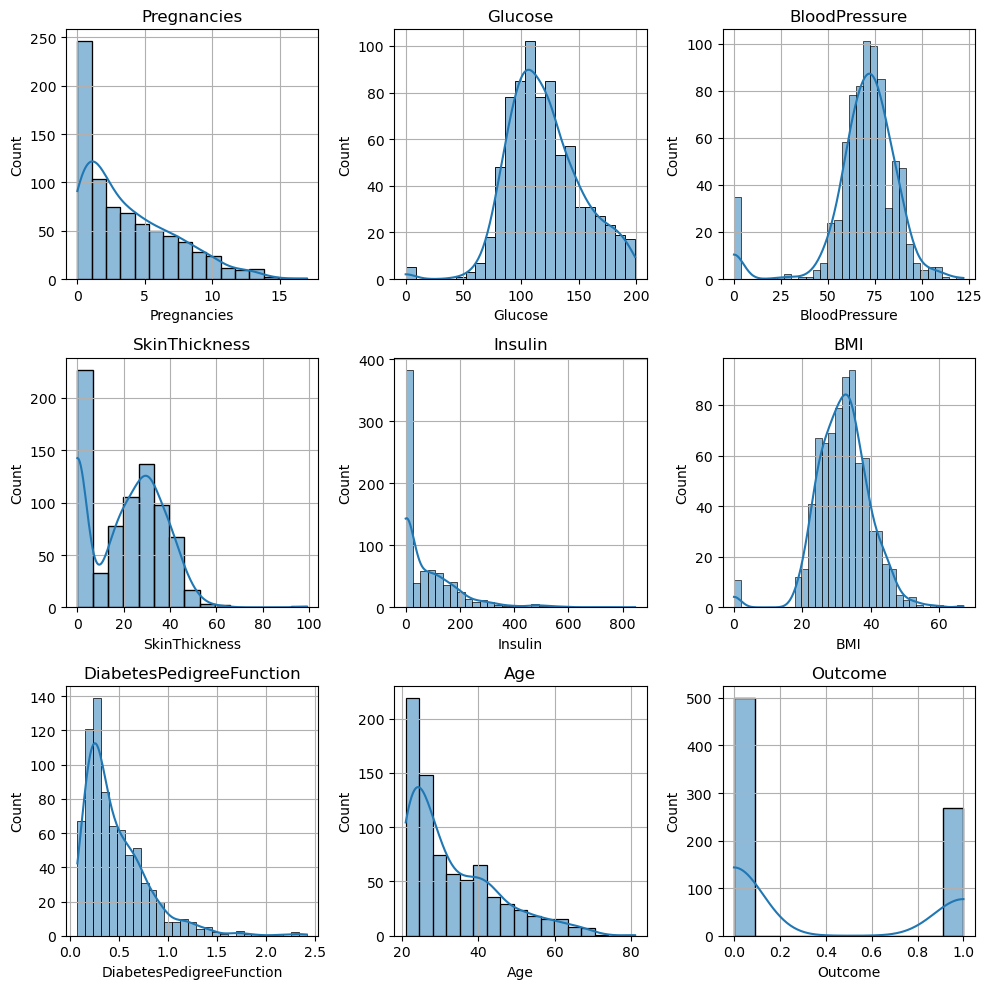

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

num_columns = len(diabetes_data.columns)

fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (10,10))

for ax, cols in zip(axes.ravel(), diabetes_data.columns):
    sns.histplot(diabetes_data[cols], kde=True, ax = ax)
    ax.set_title(cols)
    ax.grid()

plt.tight_layout()
plt.show()

### Aiming to impute NaN values for the columns in accordance with their distribution



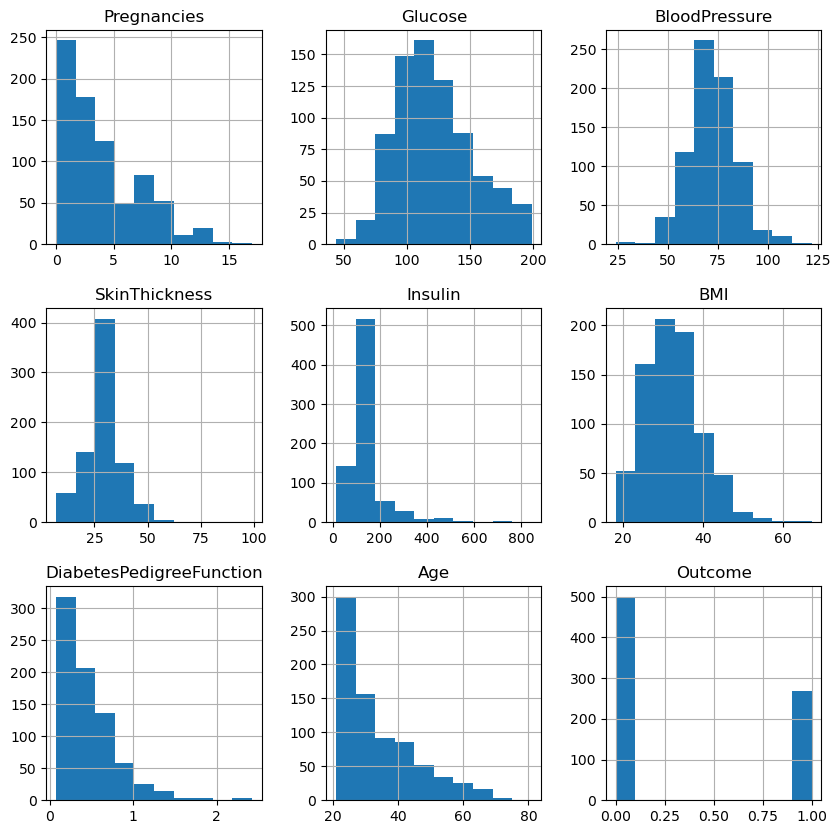

In [15]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

p = diabetes_data_copy.hist(figsize = (10,10))

#### Left-skewed vs Right-skewed distribution

![](pearson-mode-skewness.jpg)

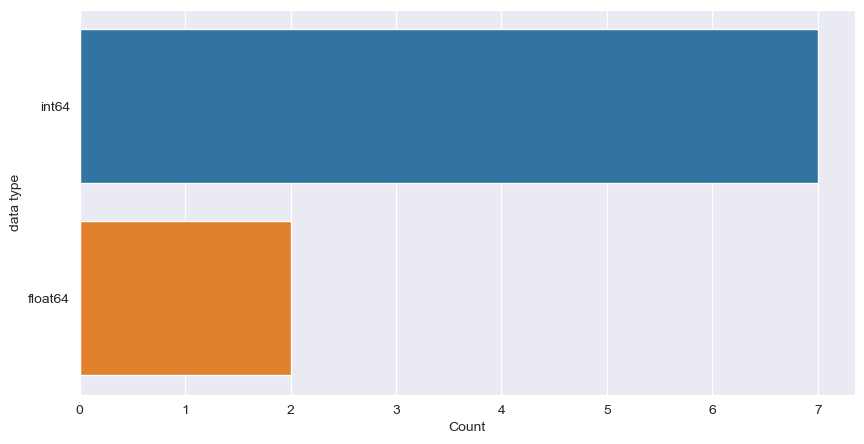

In [18]:
plt.figure(figsize=(10, 5))
sns.countplot(y=diabetes_data.dtypes, data = diabetes_data)
plt.xlabel("Count")
plt.ylabel("data type")
plt.show()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


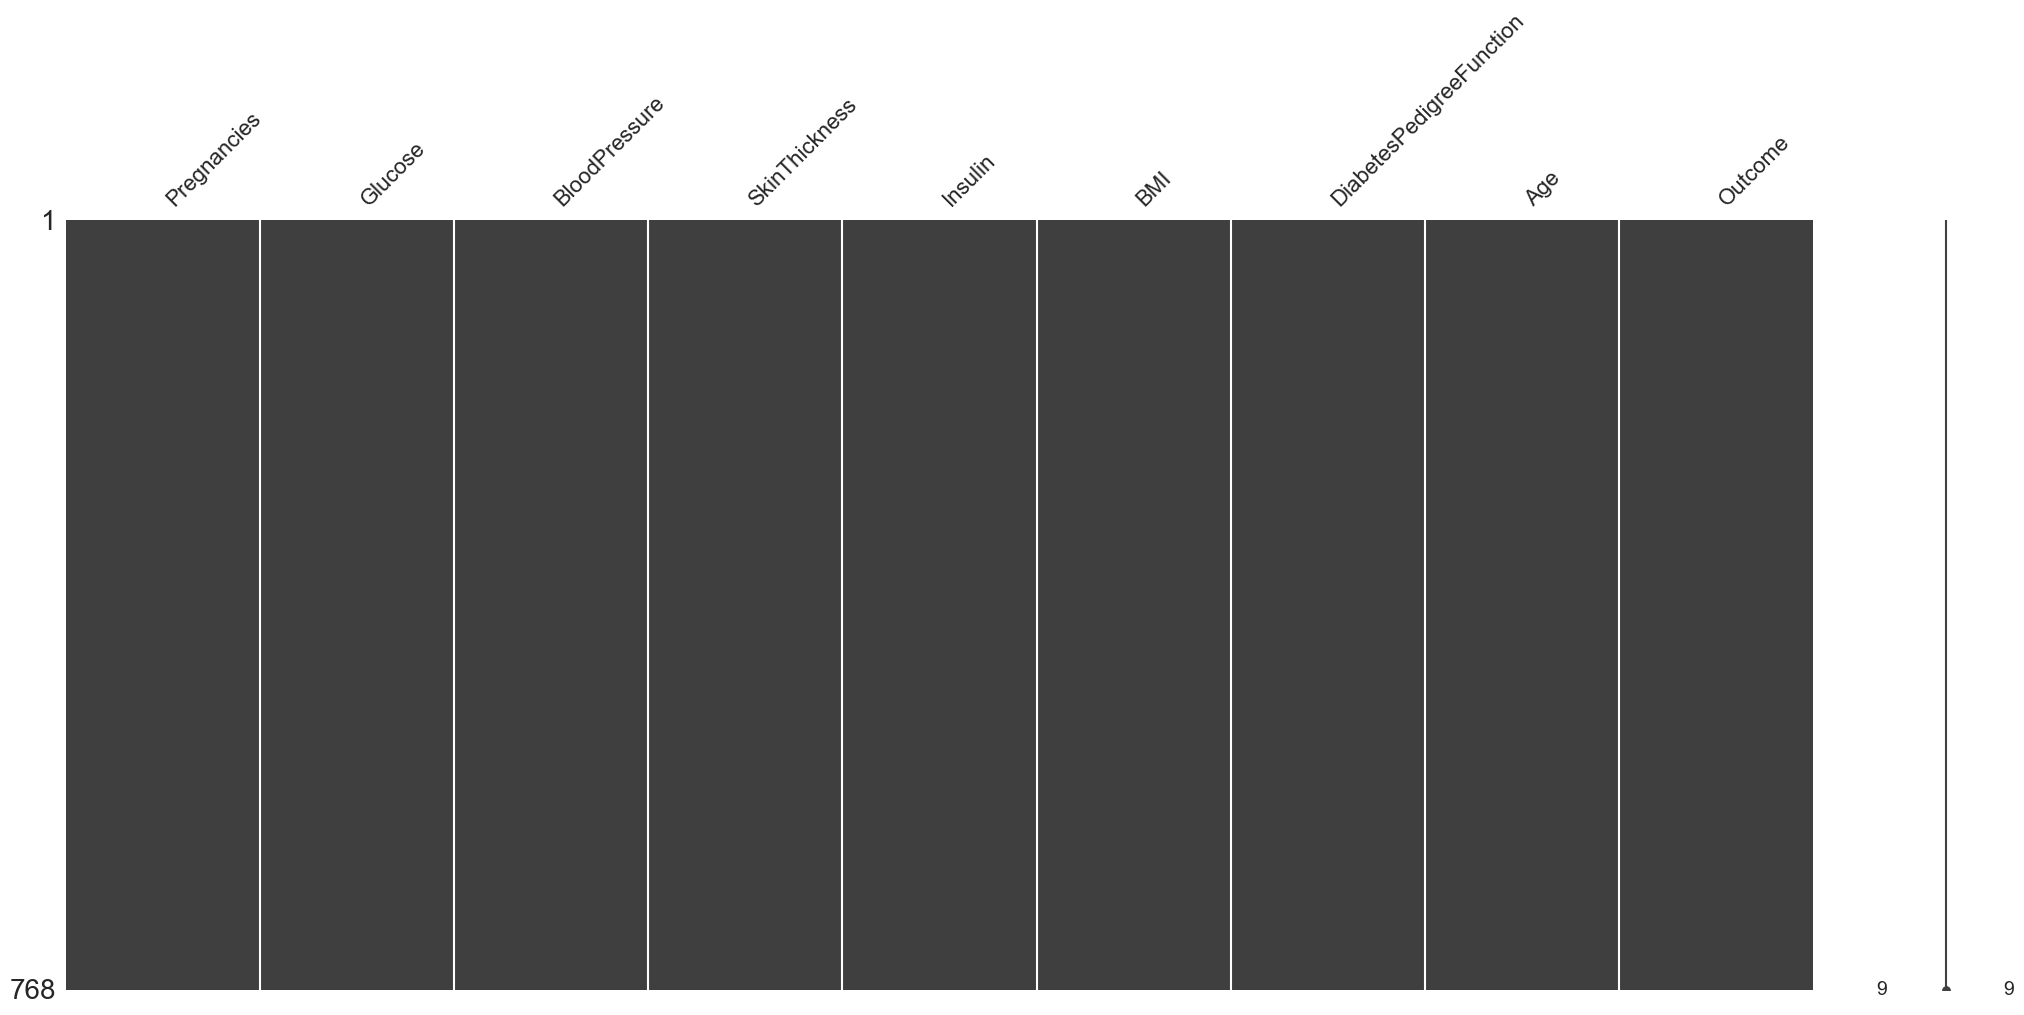

In [25]:
p = msno.matrix(diabetes_data)


In [26]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x = pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

x.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.862287,-0.032746,0.558557,NaN,0.165097,0.468492,1.425995
613,0.639947,-0.546827,0.613787,-0.110193,NaN,0.006147,1.226542,-0.616111
208,-0.844885,-0.841758,-0.679278,-0.205728,-0.577856,0.107297,-0.552308,-1.041549
260,-0.250952,2.271402,-0.356012,-1.352156,-0.215370,-0.225054,-0.522107,0.064591
91,0.046014,0.043035,0.613787,-1.352156,0.172407,-0.066104,-0.087210,0.064591
